In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/robertkaiser/CodingProjects/Kaggle/Apr21Comp'

In [37]:
test = pd.read_csv('Data/test.csv')
test.set_index('PassengerId', inplace = True)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [38]:
train = pd.read_csv('Data/train.csv')
train.set_index('PassengerId', inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


## Explore Train Data

Aim is to look into the train data-set to find out trends and distributions

### Survival Rate

In [8]:
#Look at survivial rate
train['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

In [9]:
sum(train['Survived'])/len(train['Survived'])
#survival rate is 42%

0.42774

In [21]:
#Suvival by class
train.groupby('Pclass').apply(lambda x: sum(x['Survived'])/len(x))

Pclass
1    0.579779
2    0.525018
3    0.247305
dtype: float64

In [22]:
#Suvival by embarkment point
train.groupby('Embarked').apply(lambda x: sum(x['Survived'])/len(x))

#High rate in Southampton

Embarked
C    0.751296
Q    0.596976
S    0.315294
dtype: float64

In [27]:
train.groupby(['Embarked','Pclass']).apply(lambda x: len(x))

#High southampton rate potentially caused by prevelance of third class pasengers

Embarked  Pclass
C         1         11843
          2          6156
          3          4188
Q         1          3751
          2           844
          3           829
S         1         14635
          2         21609
          3         35895
dtype: int64

In [30]:
train['Sex'].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

In [29]:
train.groupby('Sex').apply(lambda x: sum(x['Survived'])/len(x))

Sex
female    0.711525
male      0.205795
dtype: float64

In [33]:
train.groupby(['Pclass','Sex']).apply(lambda x: len(x))

Pclass  Sex   
1       female    16084
        male      14231
2       female    15283
        male      13396
3       female    12519
        male      28487
dtype: int64

In [34]:
train.groupby('SibSp').apply(lambda x: sum(x['Survived'])/len(x))


SibSp
0    0.426843
1    0.433748
2    0.453956
3    0.400000
4    0.375856
5    0.189394
8    0.385135
dtype: float64

## Correlation Plot

In [49]:
#Built quick cabin flag to indicate whether they had a cabin or not, may expand to build a "no cabin", "C Floor", "B Floor"... feature
train['CabinFlag'] = train['Cabin'].isna().astype('int')

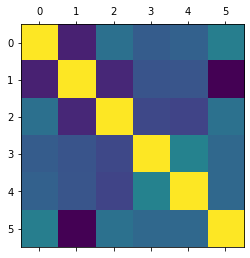

In [39]:
plt.matshow(train.corr())
plt.show()

In [48]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare,CabinFlag
Survived,1.000000,-0.289723,0.103895,-0.007587,0.023352,0.187534,-0.251554
Pclass,-0.289723,1.000000,-0.259109,-0.051436,-0.041848,-0.417354,0.709274
Age,0.103895,-0.259109,1.000000,-0.112459,-0.125535,0.109164,-0.233788
SibSp,-0.007587,-0.051436,-0.112459,1.000000,0.213126,0.059358,-0.066946
Parch,0.023352,-0.041848,-0.125535,0.213126,1.000000,0.061443,-0.076096
Fare,0.187534,-0.417354,0.109164,0.059358,0.061443,1.000000,-0.464407
CabinFlag,-0.251554,0.709274,-0.233788,-0.066946,-0.076096,-0.464407,1.000000
